In [1]:
print ("PROJECT TITLE: Mental Health Status Detection Using Semantic Sentiment Analysis")


PROJECT TITLE: Mental Health Status Detection Using Semantic Sentiment Analysis


In [4]:
import pandas as pd
df = pd.read_csv("Combined Data.csv")
print(df.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    try:
        text = text.lower()
        text = re.sub(r"http\S+|[^a-zA-Z\s]", '', text)
        words = word_tokenize(text)
        words = [w for w in words if w not in stop_words]
        return " ".join(words)
    except Exception as e:
        print("Error processing:", text)
        print("Error:", e)
        return ""

# 👇 Use the correct column name here
df['cleaned_statement'] = df['statement'].apply(clean_text)

# Preview cleaned data
print(df[['statement', 'cleaned_statement']].head(10))


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# You can use 'cleaned_statement' or 'lemmatized' (if you did lemmatization)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_statement'])  # or df['lemmatized'] if created

print(X.shape)  # Should show (number of samples, 5000)


(53043, 5000)


In [13]:
import pandas as pd
df = pd.read_csv('Combined Data.csv')
print("Column names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Column names:
['Unnamed: 0', 'statement', 'status']

First few rows:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [32]:
# Show all unique emotional classes in the dataset
print("Unique emotional classes (status):")
print(df['status'].unique())


Unique emotional classes (status):
['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [24]:
from sklearn.preprocessing import LabelEncoder

# Step 6: Encode the target labels (status)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['status'])  # Converts labels like "Anxiety", "Depression" to 0, 1, etc.

# Optional: Print the mapping of classes to encoded numbers
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'Anxiety': np.int64(0), 'Bipolar': np.int64(1), 'Depression': np.int64(2), 'Normal': np.int64(3), 'Personality disorder': np.int64(4), 'Stress': np.int64(5), 'Suicidal': np.int64(6)}


In [25]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load your data
df = pd.read_csv('Combined Data.csv')

# Step 2: Clean the text data
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    try:
        text = text.lower()
        text = re.sub(r"http\S+|[^a-zA-Z\s]", '', text)
        words = word_tokenize(text)
        words = [w for w in words if w not in stop_words]
        return " ".join(words)
    except Exception as e:
        print("Error processing:", text)
        print("Error:", e)
        return ""

df['cleaned_statement'] = df['statement'].apply(clean_text)

# Step 3: Prepare your features (X)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['cleaned_statement'])

# Step 4: Prepare your target variable (y)
y = df['status']

# Step 5: Train-Test Split with Stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Initialize and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [26]:
# Step 8: Train the Classifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


Accuracy: 0.75
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.84      0.74      0.78       778
             Bipolar       0.85      0.69      0.76       575
          Depression       0.70      0.73      0.72      3081
              Normal       0.81      0.95      0.87      3270
Personality disorder       0.88      0.42      0.57       240
              Stress       0.66      0.41      0.51       534
            Suicidal       0.68      0.62      0.65      2131

            accuracy                           0.75     10609
           macro avg       0.77      0.65      0.69     10609
        weighted avg       0.75      0.75      0.74     10609



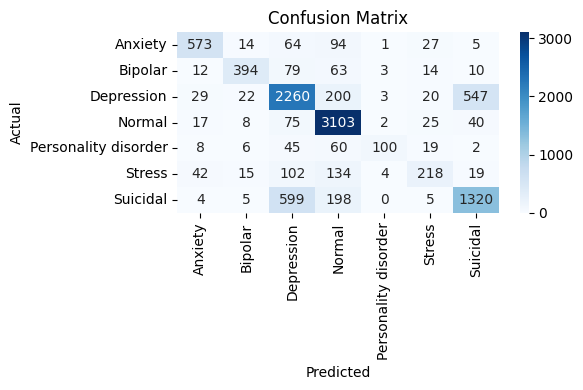

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [33]:
# Step 11: Suggest Positive Replies Based on Predicted Class

positive_replies = {
    "Anxiety": "You're doing great. Take a deep breath and remember that this feeling will pass.",
    "Normal": "Glad you're feeling stable. Keep up the good self-care!",
    "Depression": "You're not alone. Even small steps forward are progress. Stay kind to yourself.",
    "Suicidal": "You matter deeply. Please consider reaching out to someone you trust or a helpline.",
    "Stress": "Take one thing at a time. You are stronger than your stress.",
    "Bipolar": "Mood swings don't define you. You're capable, valuable, and deserving of support.",
    "Personality disorder": "You are more than a label. Growth is possible, and you're not alone."
}

suggestions = []

for i in range(len(y_pred)):
    predicted_class = y_pred[i]
    message = positive_replies.get(predicted_class, "Stay strong, you're not alone.")
    suggestions.append(message)

results_df = pd.DataFrame({
    "Original Statement": df.iloc[y_test.index]['statement'].values,
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Suggested Reply": suggestions
})

print("\nSample Suggested Replies:")
print(results_df.head(10))



Sample Suggested Replies:
                                  Original Statement      Actual   Predicted  \
0  I recently went through an event that was extr...      Stress  Depression   
1      I want to rest but what if I win the giveaway      Normal      Normal   
2  Basically bro when you die you gon feel all th...    Suicidal    Suicidal   
3  Today marks 1 month since we broke up and ther...  Depression  Depression   
4  Writing these helps sooth my own wounds, and I...      Normal      Normal   
5  A <url> has been set up and I’m hoping to help...      Normal      Normal   
6  Does anyone else have pelvic floor pain after ...     Anxiety     Anxiety   
7  Even though I'm tired of biasing Sunki, it doe...      Normal      Normal   
8  Does he actually like me, or am I going to end...      Normal      Stress   
9  any tips to get through the day? Or to help fe...  Depression  Depression   

                                     Suggested Reply  
0  You're not alone. Even small steps


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)
Note: you may need to restart the kernel to use updated packages.


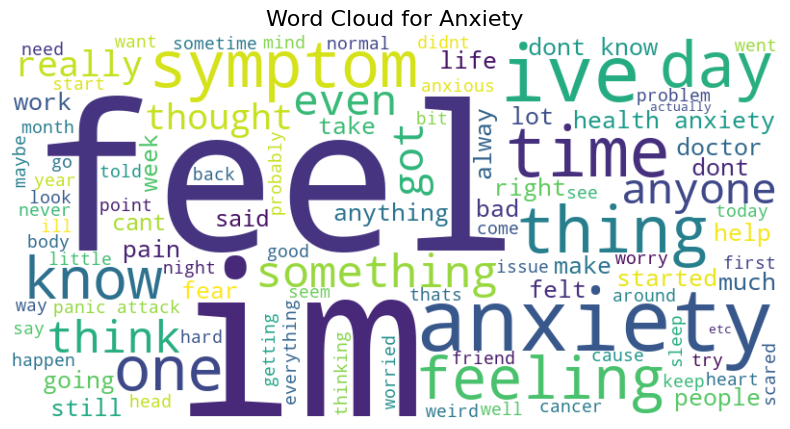

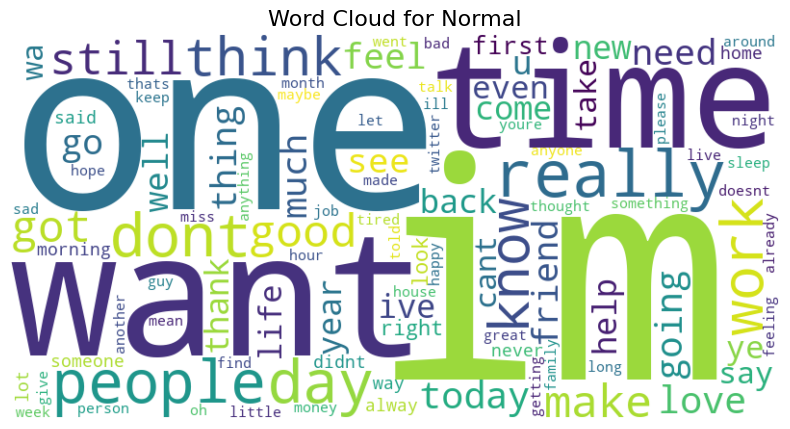

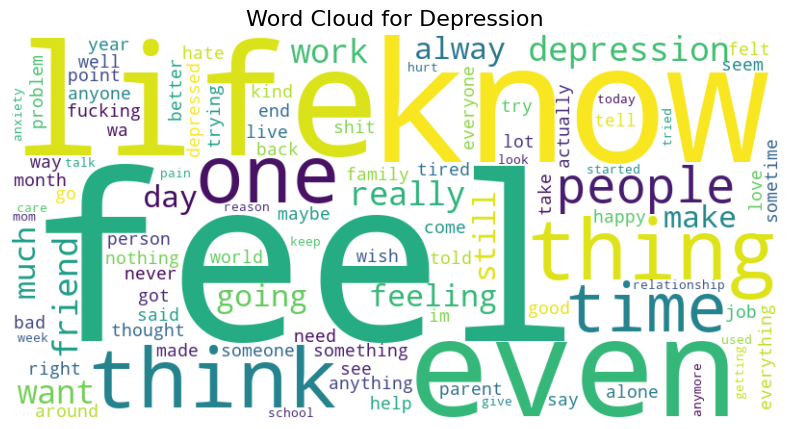

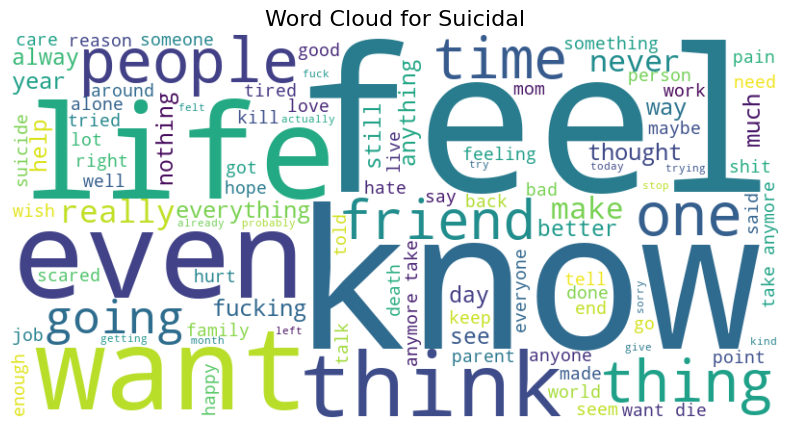

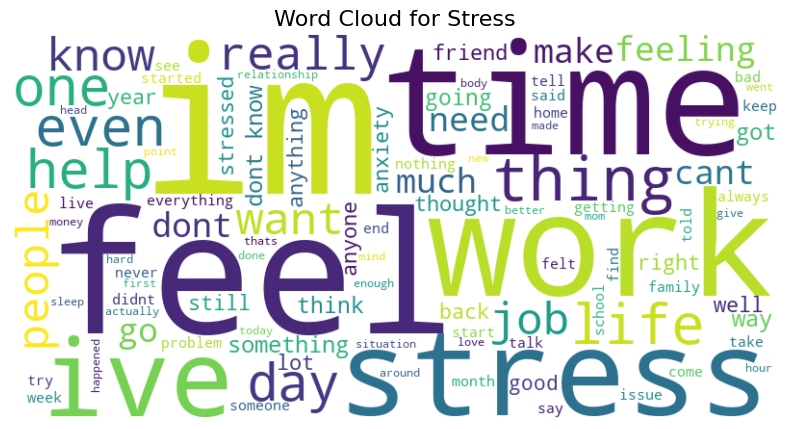

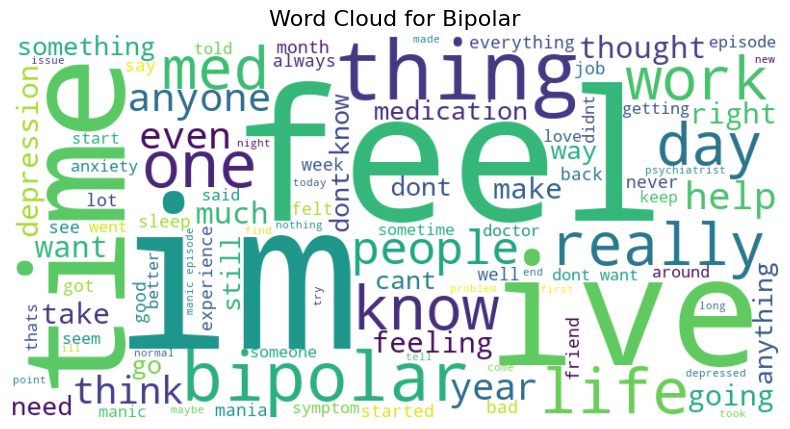

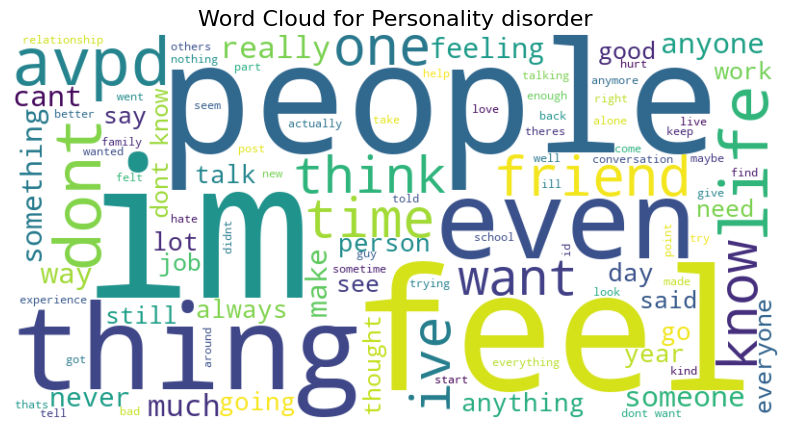

In [31]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a combined dataframe with cleaned text and encoded labels
df['encoded_status'] = label_encoder.transform(df['status'])

# Plot word clouds for each class
unique_classes = df['status'].unique()

for label in unique_classes:
    text = " ".join(df[df['status'] == label]['cleaned_statement'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {label}", fontsize=16)
    plt.show()
